In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
def load_data():
    X = np.load("/content/X.npy")
    y = np.load("/content/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [3]:
X, y = load_data()
X.shape,y.shape

((1000, 400), (1000, 1))

In [4]:
import matplotlib.pyplot as plt

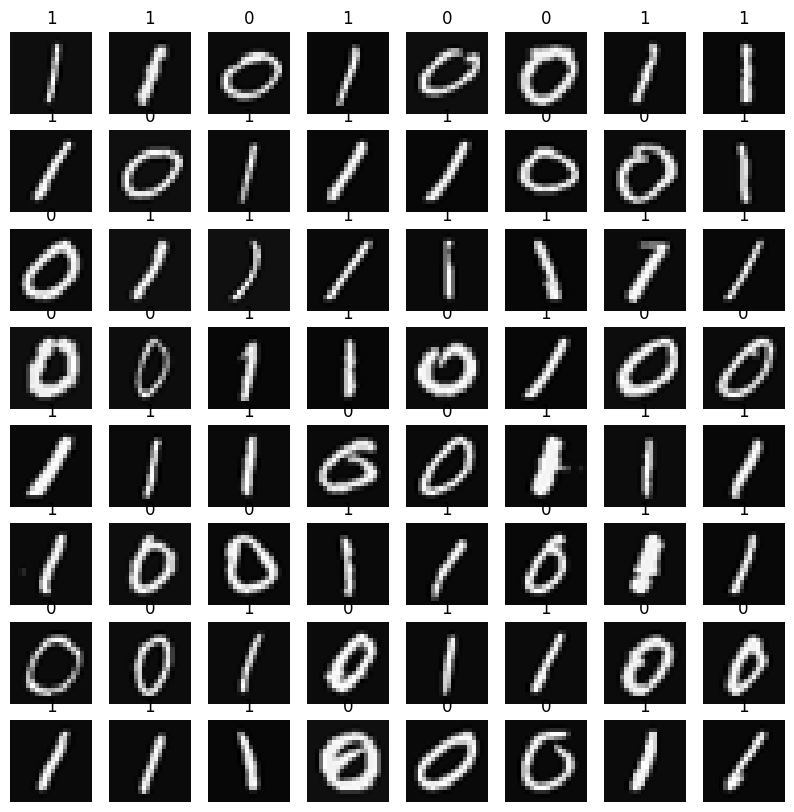

In [5]:
m,n=X.shape
fig,axes=plt.subplots(8,8,figsize=(10,10))
for i,ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_random_reshaped = X[random_index].reshape((20,20)).T
  ax.imshow(X_random_reshaped, cmap='gray')
  ax.set_title(y[random_index,0])
  ax.set_axis_off()

**Tensorflow Implementation**

In [8]:
model=Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25,activation='sigmoid',name="l1"),
    Dense(units=15,activation='sigmoid',name="l2"),
    Dense(units=1,activation='sigmoid',name="l3")
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 25)                10025     
                                                                 
 l2 (Dense)                  (None, 15)                390       
                                                                 
 l3 (Dense)                  (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
[l1,l2,l3]=model.layers

In [13]:
W1,b1 = l1.get_weights()
W2,b2 = l2.get_weights()
W3,b3 = l3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [14]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 0.6215
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4585
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3066
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2051
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1470
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1122
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0533


1/1 [==============================] - 0s 20ms/step


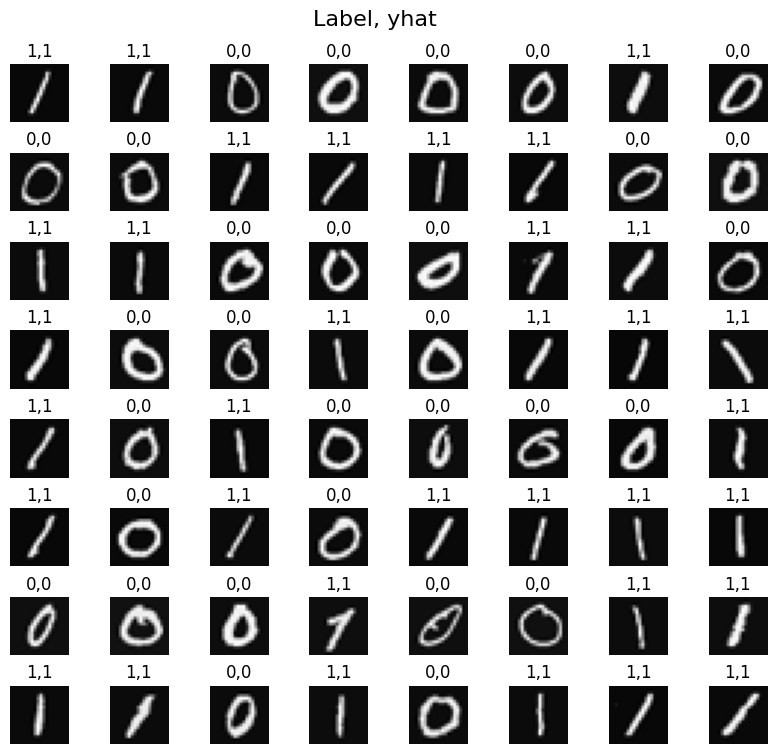

In [16]:
m, n = X.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])
for i,ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_random_reshaped = X[random_index].reshape((20,20)).T
  ax.imshow(X_random_reshaped, cmap='gray')
  prediction = model.predict(X[random_index].reshape(1,400))
  if prediction >= 0.5:
        yhat = 1
  else:
        yhat = 0
  ax.set_title(f"{y[random_index,0]},{yhat}")
  ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()